## Importing necessary libaries

In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Creating data frames

In [7]:
data  = pd.read_csv("sms.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
data.shape

(5728, 2)

In [9]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [10]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

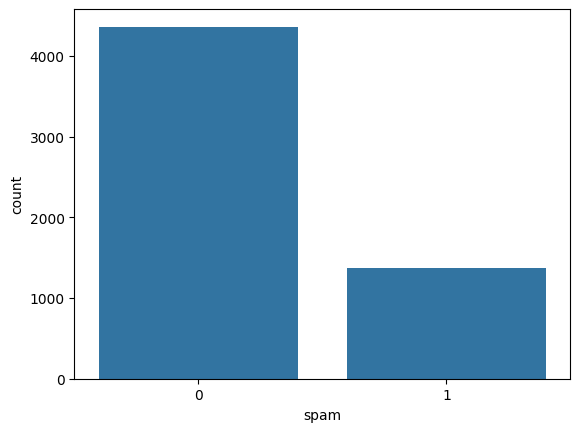

In [15]:
sns.countplot(x='spam', data=data)


## Data Cleaning

In [12]:
data.duplicated().sum()

33

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [19]:
data.shape

(5695, 2)

In [20]:
5728 - 33

5695

<Axes: xlabel='spam', ylabel='count'>

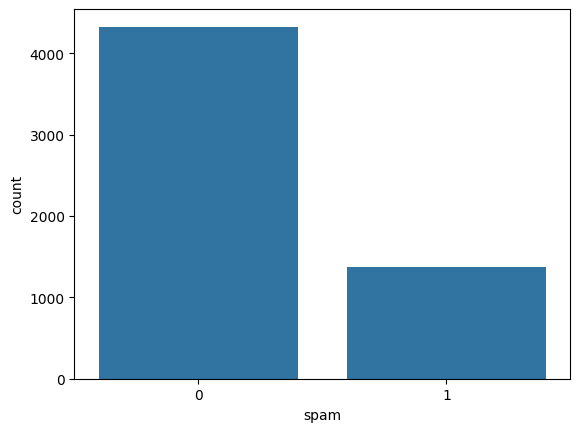

In [21]:
sns.countplot(x='spam',data=data)

In [22]:
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

## Separate in X and Y

In [23]:
X = data['text'].values
y = data['spam'].values

In [24]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Train - Test split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train.shape

(4556,)

In [27]:
X_test.shape

(1139,)

In [28]:
y_train.shape

(4556,)

In [29]:
y_test.shape

(1139,)

## Preprocessing

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv=CountVectorizer()
x_train=cv.fit_transform(X_train)

In [32]:
x_train.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
len(x_train.toarray())

4556

In [34]:
len(x_train.toarray()[0])

33126

## Training by ML Alogorithm

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [36]:
nb.fit(x_train,y_train)

MultinomialNB()

In [37]:
x_test = cv.transform(X_test)

In [38]:
len(x_test.toarray())

1139

In [39]:
len(x_test.toarray()[0])

33126

In [40]:
y_pred = nb.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print("Testing Accuracy:")
accuracy_score(y_pred,y_test)

Testing Accuracy:


0.990342405618964

## Lets test using some sms

In [45]:
sms = ["Hey , Riya whats up ? Tomrrow please meet with me at my home." ]

In [46]:
clean_sms=cv.transform(sms)

In [47]:
len(clean_sms.toarray()[0])

33126

In [48]:
check=nb.predict(clean_sms)[0]

In [49]:
check

0

## Evaluation Function

In [50]:
sms = ["Hey i am Priya . Get a brand new dress from Zara"]
clean_sms = cv.transform(sms)
check = nb.predict(clean_sms)[0]

if check==0:
    print("This is a Ham SMS")

else:
    print("This is a Spam SMS")    




This is a Spam SMS
